In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline

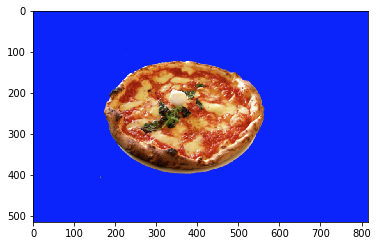

In [5]:
# read the image and show the image 
image = mpimg.imread("images/pizza_bluescreen.jpg")
plt.imshow(image)
plt.show()

In [7]:
# print the type and shape of the image

print("The type of the image:",type(image))
print("The shape of the image:", image.shape)

The type of the image: <class 'numpy.ndarray'>
The shape of the image: (514, 816, 3)


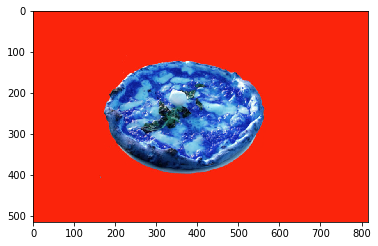

In [6]:
# reading and plotting using cv2

image2 = cv2.imread('images/pizza_bluescreen.jpg')
plt.imshow(image2)
plt.show()

In [ ]:
#OpenCV reads in colors as GBR and not RGB



In [9]:
# notice that in cv2 , the colors are inverted , GBR

# print the type and shape of the image

print("The type of the image:",type(image2))
print("The shape of the image:", image2.shape)

The type of the image: <class 'numpy.ndarray'>
The shape of the image: (514, 816, 3)


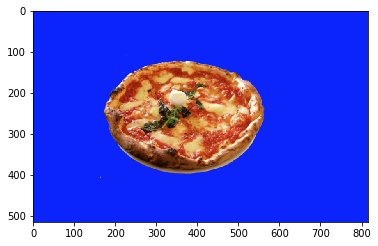

In [54]:
# make a copy of the image 

#image2_copy =image2.copy()  # or np.copy(image)

image2_copy =np.copy(image2)

# so to get the correct color codes, we use cvtCOLOR converter
image2_copy = cv2.cvtColor(image2_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image2_copy)
plt.show()

In [17]:
# Define the Color Threshold

In [104]:
# Now define the color threshold to black out or filter out some sections of the image
lower_blue = np.array([0,0,200])
upper_blue = np.array([50,70,255])



In [105]:
# create a mask

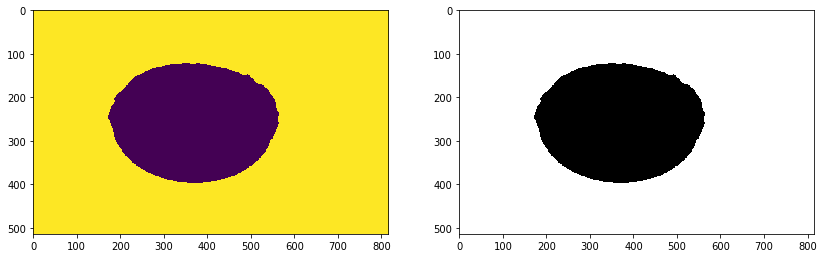

In [106]:
# define the masked area to isolate a selected area of interest and do something with that area
# we can create mask over blue area using opencv inrange function

mask = cv2.inRange(image2_copy,lower_blue,upper_blue)
# if the image2_new falls within this lower and upper bounds, then it will display that image else it will turn the image into 
# black

# plotting the mask... along with the gray plot we get


plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(mask,cmap='gray')

plt.show()



#plt.imshow(mask)

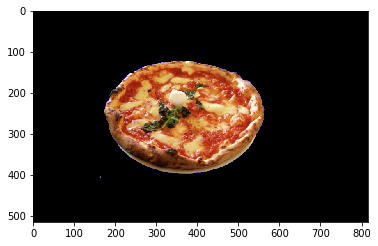

In [107]:
# mask the image to let the pizza show through
masked_image = np.copy(image2_copy)
masked_image[mask!=0]=[0,0,0]  # earlier blue area was masked....i.e blue area = 0,0
plt.imshow(masked_image)
plt.show()

(1047, 1920, 3)


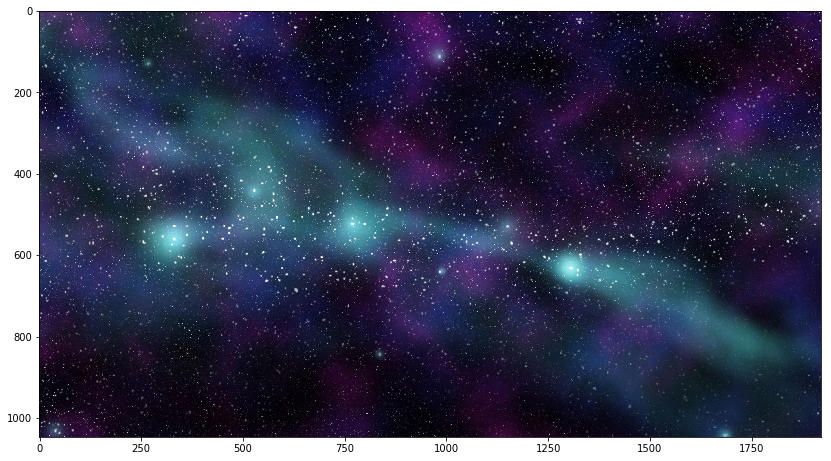

In [148]:
# mask and add a background to the pizza picture
background_image = cv2.imread("images/space_background.jpg")
# since OpenCV reads colors as GBR, we convert to RGB 
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)

print(background_image.shape)


plt.figure(figsize=(14,10))
plt.imshow(background_image)
plt.show()

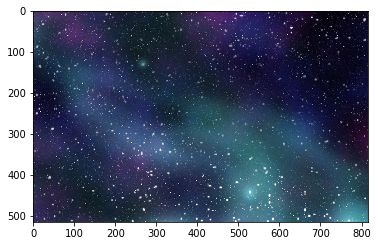

In [149]:
crop_background = background_image[0:514,0:816]
#plt.figure(figsize=(14,10))
plt.imshow(crop_background)
plt.show()

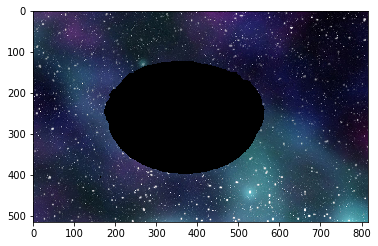

In [150]:
# crop the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)
plt.show()

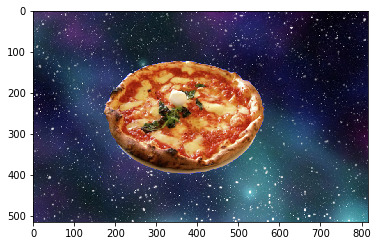

In [151]:
complete_image = crop_background+masked_image
plt.imshow(complete_image)
plt.show()

In [ ]:
# We get pizza floating in space